# Code testing and Continuous Integration

We are going to automate testing of our code as part of an example continuous integration development workflow. We'll start by installing pytest, writing or modifying some code to test, and we'll finish by setting up a github actions workflow that will run automatically when we push changes to our repo. 

## Part 0 Installing pytest

To install pytest and pytest-coverage:

In [1]:
conda install pytest pytest-cov

Solving environment: done

## Package Plan ##

  environment location: /Users/weilingfeng/Software/miniconda3/envs/DSFP

  added / updated specs:
    - pytest
    - pytest-cov


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py38hca03da5_0         153 KB
    coverage-6.3.2             |   py38h1a28f6b_0         236 KB
    iniconfig-1.1.1            |     pyhd3eb1b0_0           8 KB
    openssl-1.1.1q             |       h1a28f6b_0         2.2 MB
    pluggy-1.0.0               |   py38hca03da5_1          26 KB
    py-1.11.0                  |     pyhd3eb1b0_0          76 KB
    pytest-7.1.2               |   py38hca03da5_0         443 KB
    pytest-cov-3.0.0           |     pyhd3eb1b0_0          22 KB
    toml-0.10.2                |     pyhd3eb1b0_0          20 KB
    tomli-2.0.1                |   py38hca03da5_0          25 KB
    ------------------------

## Part 1 Returning to the SDSS Clustering Example

### 1a) Computing statistics of cluster center separation

Report the minimum, maximum, and average separation between the centers of the clusters you identified in the introduction to software repositories example. Cluster centers/cores are stored in the "core_sample_indices_" attribute of most sklearn clustering objects. 

You will want this to be done in a modular fashion. First compute the separation distance of the cluster centers. Then write separate functions that return the minimum, maximum, and average.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, cluster_optics_dbscan

X = np.load('SDSS_Great_Wall_data.npy')

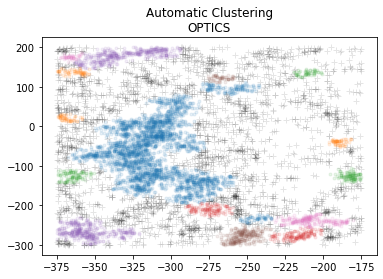

In [96]:
from sklearn.cluster import DBSCAN
# clust = OPTICS().fit_predict(X)
clust = DBSCAN(eps=10, min_samples=50)
clust.fit(X)

fig, ax = plt.subplots()
colors = ["C0.", "C1.", "C2.", "C3.", "C4.", "C5.", "C6."]
for klass in range(len(np.unique(clust.labels_)) - 1):
    Xk = X[clust.labels_ == klass]
    ax.plot(Xk[:, 0], Xk[:, 1], colors[klass%len(colors)], alpha=0.1)

ax.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax.set_title("Automatic Clustering\nOPTICS")
plt.show()

In [ ]:
def distance(point1, point2):
    
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    dist = ((x1 - x2)**2 + (y1 - y2)**2)**(1/2)
    
    return dist

def average(distances):
    distance = 0
    num = 0
    for val in distances:
        distance = distance + distances
        num = num + 1
    return float(distance)/float(num)

In [107]:
ncluster = len(np.unique(clust.labels_))-1
centers = []
for klass in range(len(np.unique(clust.labels_)) - 1):
    Xk = X[clust.labels_ == klass]
    centers.append([np.average(Xk[:, 0]), np.average(Xk[:, 1])])
centers = np.array(centers)

In [116]:
dist_matrix = np.zeros((ncluster, ncluster))
for i in range(ncluster):
    dist_matrix[i, :] = ((centers[i, 0] - centers[:, 0])**2 + (centers[i, 1] - centers[:, 1])**2)**(1/2)

In [118]:
np.mean(dist_matrix)

218.39523098842577

### 1b) Writing a unit test for cluster center separation

A good unit test: 

* Fast
* Standalone
* Repeatable (deterministic?) 
* Timely (your test shouldn't take longer than the code to write) 

For each function you wrote in 2a), write a test function. 

In [ ]:
# calculate pairwise distances

# fill this in 

In [ ]:
def test_distance():
    point1 = [0, 3]
    point2 = [4, 0]
    dist = distance(point1, point2)
    assert dist == (3**2 + 4**2)**(1/2)

In [120]:
def test_average():
    dist1 = 3
    dist2 = 7
    dist3 = 8
    avrg = average([dist1, dist2, dist3])
    assert avrg == (3+7+8)/3

## Part 2  Running unit tests in pytest

### 2a) Structuring the test file

Unfortunately, github actions and pytest require us to convert our jupyter notebooks to python scripts before running CI tests. There are tools to automate this for us, but for now, let's do this by hand. 

pytest expects your code to be organized according to the following convention - you should have a `file_name.py` and a `test_file_name.py`. Create each. In `file_name.py`, copy the functions for computing cluster distances and statistics. Then, in `test_file_name.py`, copy your unit tests. Be sure to import the methods from `file_name.py` into the test file script. 

### 2b) Running the unit test and checking coverage

Now to run the unit test - just type `pytest` at the command line of your conda virtual environment. 

To check the coverage (how well your tests cover your code) type `pytest --cov`

If your tests do not achieve full coverage of your code, modify your tests accordingly.

If your tests achieve complete coverage and your code passes your tests, move to part 3 below. 

### 2c) Bug fixes

If your code fails any of your tests, fix your code now and repeat until your code passes your tests. 

## Part 3 Automating Unit Tests with Github Actions

### Part 3a) Initial Github Actions Workflow template

You should find a partially complete github actions workflow template as a .yml file. Github helpfully provides many template workflows for different languages and use cases, so most of the time, you'll just need to fill in the details of an existing workflow. 


### Part 3b) Fill in when you want the tests to run so that the code runs on a push or pull_request to your working branches and main

### Part 3c) make sure that dependencies are properly installed on the virtual machine ("runner") that will execute your tests. Up to this point, you should have very minimal dependencies, but for yesterday's SDSS clustering project, you may have more complicated ones. If you have a requirements.txt file in your github directory, you can install dependencies with `pip install -r requirements.txt` - there are many ways to produce a requirements file, but I might start by trying `pip freeze > requirements.txt` within your virtual environment.

### Part 3d) Now push to your main branch and check for errors. Fix any that occur. 

## Part 4 Complete Workflow

In this part, work with your partner to adapt yesterday's example clustering problem to the full git collaborative and test-driven workflow. Open Issues for features you want to include, design tests for those features, implement them, make simultaneous changes to the clustering implementation, make push/pull requests, and automate unit testing of your code. Alternatively, get an early start on a problem you might work on in the hackathon by creating a repository, writing some code, and executing unit tests.